# Random Forest Regression

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance


In [1]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\vatsal\anaconda3\lib\site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [3]:
data_for_model = pickle.load(open("C:/Users/vatsal/Desktop/machine learning/model builidng/data/abc_regression_modelling.p", "rb"))
data_for_model

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,524,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,607,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,343,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,322,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...,...
862,4,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,372,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,104,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,373,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [4]:
data_for_model.drop("customer_id", axis =1, inplace=True)
data_for_model

,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...
862,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [5]:
#shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [6]:
#dealing with missing value
data_for_model.isna().sum

<bound method DataFrame.sum of      distance_from_store  gender  credit_score  customer_loyalty_score  \
455                False   False         False                   False   
621                False   False         False                   False   
64                 False   False         False                   False   
456                False   False         False                   False   
196                False   False         False                   False   
..                   ...     ...           ...                     ...   
146                False   False         False                   False   
226                False   False         False                   False   
588                False   False         False                   False   
771                False   False         False                   False   
219                False   False         False                   False   

     total_sales  total_items  transaction_count  product_area_count  \
455     

In [7]:
data_for_model.dropna(how="any", inplace=True)
data_for_model

C:\Users\vatsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
455,0.28,M,0.81,0.889,990.65,243,53,4,18.691509
621,2.58,F,0.58,0.162,333.26,70,13,4,25.635385
64,0.80,M,0.80,0.956,1753.96,371,52,5,33.730000
456,0.16,M,0.56,0.926,929.57,225,51,4,18.226863
196,3.27,F,0.67,0.297,1904.55,376,36,3,52.904167
...,...,...,...,...,...,...,...,...,...
146,1.34,M,0.57,0.690,1682.14,364,47,4,35.790213
226,1.85,M,0.63,0.242,1787.61,196,53,5,33.728491
588,1.53,F,0.54,0.324,1173.84,193,55,5,21.342545
771,2.28,F,0.45,0.079,70.67,23,4,3,17.667500


In [8]:
#split input variables & output variables

X = data_for_model.drop(["customer_loyalty_score"], axis = 1)
y = data_for_model["customer_loyalty_score"]
X,y

(     distance_from_store gender  credit_score  total_sales  total_items  \
 455                 0.28      M          0.81       990.65          243   
 621                 2.58      F          0.58       333.26           70   
 64                  0.80      M          0.80      1753.96          371   
 456                 0.16      M          0.56       929.57          225   
 196                 3.27      F          0.67      1904.55          376   
 ..                   ...    ...           ...          ...          ...   
 146                 1.34      M          0.57      1682.14          364   
 226                 1.85      M          0.63      1787.61          196   
 588                 1.53      F          0.54      1173.84          193   
 771                 2.28      F          0.45        70.67           23   
 219                 3.91      F          0.58      2802.51          293   
 
      transaction_count  product_area_count  average_basket_value  
 455              

In [9]:
#split out Training & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#deal with categorical variables

categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False, drop="first")

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis = 1)
X_train.drop(categorical_vars, axis =1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis = 1)
X_test.drop(categorical_vars, axis =1, inplace = True)
X_train,X_test

C:\Users\vatsal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(     distance_from_store  credit_score  total_sales  total_items  \
 0                   0.04          0.67      1191.53          216   
 1                   2.04          0.64      1581.41          343   
 2                   2.24          0.63      1327.51          266   
 3                   1.72          0.59      2094.10          352   
 4                   0.24          0.53      1133.45          180   
 ..                   ...           ...          ...          ...   
 310                 0.37          0.61      1397.66          270   
 311                 2.94          0.62      2397.63          282   
 312                 2.31          0.53      1805.39          298   
 313                 2.80          0.41      1524.01          278   
 314                 4.47          0.74      3770.71          415   
 
      transaction_count  product_area_count  average_basket_value  gender_M  
 0                   53                   5             22.481698       1.0  
 1            

In [10]:
#Model Training
regressor = RandomForestRegressor(random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
##Model Assessment
#Predict on the Test Set
y_pred = regressor.predict(X_test)

#Calculate R squared
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.9598627943571644


In [12]:
#Cross validation
cv = KFold(n_splits = 4, shuffle = True, random_state = 42)
cv_scores= cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean()

0.9248589874052471

In [13]:
#Calculated Adjusted R-squared
num_data_points, num_input_vars = X_test.shape
num_data_points, num_input_vars
adjusted_r_squared = 1 - (1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.9552756851408403


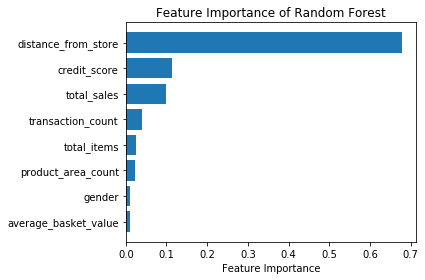

In [15]:
# Feature Importance


feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names, feature_importance], axis = 1)
feature_importance_summary.columns = ["input_variable", "feature_importance"]
feature_importance_summary.sort_values(by = "feature_importance", inplace = True)

plt.barh(feature_importance_summary["input_variable"], feature_importance_summary["feature_importance"])
plt.title("Feature Importance of Random Forest")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [17]:
# Permutation Importance
result = permutation_importance(regressor, X_test, y_test, n_repeats = 10, random_state = 42)
result

{'importances_mean': array([1.45815078e+00, 1.27463198e-03, 1.18714590e-01, 1.29790448e-01,
        1.74368314e-02, 4.40707405e-02, 8.22511134e-03, 4.00298537e-03]),
 'importances_std': array([0.1803007 , 0.00124786, 0.02175463, 0.00978399, 0.00387002,
        0.00931063, 0.00327316, 0.00149292]),
 'importances': array([[ 1.35805446e+00,  1.33153690e+00,  1.23947045e+00,
          1.15372568e+00,  1.67458047e+00,  1.50216533e+00,
          1.70916672e+00,  1.49599713e+00,  1.44612233e+00,
          1.67068834e+00],
        [ 1.28814398e-03,  1.61237588e-03,  4.33736701e-04,
          1.63969324e-03,  5.96202645e-04,  3.81532598e-03,
         -1.27024759e-03,  1.87601088e-03,  2.02644321e-03,
          7.28634921e-04],
        [ 1.01896138e-01,  1.28003609e-01,  1.67307696e-01,
          1.20421584e-01,  1.30874769e-01,  1.03604171e-01,
          8.31711550e-02,  1.06843535e-01,  1.12764762e-01,
          1.32258481e-01],
        [ 1.17741079e-01,  1.41796746e-01,  1.29612448e-01,
     

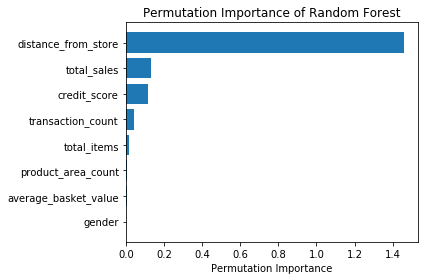

In [18]:
permutation_importance = pd.DataFrame(result["importances_mean"])
feature_names = pd.DataFrame(X.columns)
permutation_importance_summary = pd.concat([feature_names, permutation_importance], axis = 1)
permutation_importance_summary.columns = ["input_variable", "permutation_importance"]
permutation_importance_summary.sort_values(by = "permutation_importance", inplace = True)

plt.barh(permutation_importance_summary["input_variable"], permutation_importance_summary["permutation_importance"])
plt.title("Permutation Importance of Random Forest")
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()

In [21]:
# Predictions under the hood
y_pred[0]
new_data = [X_test.iloc[0]]
regressor.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1608637542),
 DecisionTreeRegressor(max_features='auto', random_state=1273642419),
 DecisionTreeRegressor(max_features='auto', random_state=1935803228),
 DecisionTreeRegressor(max_features='auto', random_state=787846414),
 DecisionTreeRegressor(max_features='auto', random_state=996406378),
 DecisionTreeRegressor(max_features='auto', random_state=1201263687),
 DecisionTreeRegressor(max_features='auto', random_state=423734972),
 DecisionTreeRegressor(max_features='auto', random_state=415968276),
 DecisionTreeRegressor(max_features='auto', random_state=670094950),
 DecisionTreeRegressor(max_features='auto', random_state=1914837113),
 DecisionTreeRegressor(max_features='auto', random_state=669991378),
 DecisionTreeRegressor(max_features='auto', random_state=429389014),
 DecisionTreeRegressor(max_features='auto', random_state=249467210),
 DecisionTreeRegressor(max_features='auto', random_state=1972458954),
 DecisionTreeRegressor(max_f

In [22]:
predictions = []
tree_count = 0
for tree in regressor.estimators_ :
    prediction = tree.predict(new_data)[0]
    predictions.append(prediction)
    tree_count += 1


In [23]:
predictions

[0.201,
 0.668,
 0.117,
 0.17,
 0.203,
 0.268,
 0.17,
 0.203,
 0.23400000000000004,
 0.17,
 0.234,
 0.12,
 0.234,
 0.174,
 0.147,
 0.352,
 0.268,
 0.234,
 0.234,
 0.234,
 0.203,
 0.17400000000000002,
 0.17,
 0.234,
 0.177,
 0.12,
 0.314,
 0.174,
 0.234,
 0.302,
 0.352,
 0.314,
 0.234,
 0.174,
 0.116,
 0.221,
 0.147,
 0.177,
 0.203,
 0.147,
 0.12,
 0.234,
 0.234,
 0.201,
 0.177,
 0.221,
 0.203,
 0.366,
 0.201,
 0.334,
 0.366,
 0.17,
 0.448,
 0.12,
 0.234,
 0.136,
 0.23400000000000004,
 0.17,
 0.174,
 0.201,
 0.147,
 0.201,
 0.366,
 0.344,
 0.221,
 0.17400000000000002,
 0.234,
 0.177,
 0.17,
 0.12,
 0.42,
 0.344,
 0.12,
 0.221,
 0.17,
 0.234,
 0.17,
 0.203,
 0.234,
 0.234,
 0.314,
 0.234,
 0.234,
 0.143,
 0.17,
 0.234,
 0.201,
 0.12,
 0.174,
 0.201,
 0.35200000000000004,
 0.234,
 0.174,
 0.506,
 0.177,
 0.352,
 0.352,
 0.147,
 0.234,
 0.201]

In [24]:
sum(predictions) / tree_count

0.22624000000000016

In [25]:
import pickle
pickle.dump(regressor, open("C:/Users/vatsal/Desktop/machine learning/model builidng/data/random_forest_regression_model.p", "wb"))
pickle.dump(one_hot_encoder, open("C:/Users/vatsal/Desktop/machine learning/model builidng/data/random_forest_regression_ohe.p", "wb"))